In [143]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

# Import

In [144]:
data = pd.read_csv('../data/dax_indicator_2000_2024.csv')
data.head()

,Date,volume,direction_num,direction,sma_3,rsi_3,rsi_7,rsi_14,BBB_3_2.0,BBP_3_2.0,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,2000-02-18,52728400,-10.610352,0,7488.993164,59.830213,59.650151,60.567120,4.021197,5.459555,...,0,0,0,1,0,0,1,0,0,1
1,2000-02-21,24404000,22.189941,1,7548.209798,58.108209,59.105378,60.291178,2.174134,4.021197,...,0,0,0,1,0,1,1,0,0,1
2,2000-02-22,51082700,27.560059,1,7581.613118,62.161855,60.158780,60.768826,0.363033,2.174134,...,0,0,1,1,0,0,1,0,0,1
3,2000-02-23,42673800,79.140137,1,7590.749837,67.122070,61.365586,61.290040,0.734931,0.363033,...,0,0,0,0,0,0,1,0,0,1
4,2000-02-24,38686700,-56.390137,0,7632.479980,83.788987,67.390827,63.984327,2.491977,0.734931,...,0,0,0,1,0,0,1,0,0,1


In [145]:
data.drop('Date', axis=1, inplace=True)
data.head()

,volume,direction_num,direction,sma_3,rsi_3,rsi_7,rsi_14,BBB_3_2.0,BBP_3_2.0,BBB_7_2.0,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,52728400,-10.610352,0,7488.993164,59.830213,59.650151,60.567120,4.021197,5.459555,5.130389,...,0,0,0,1,0,0,1,0,0,1
1,24404000,22.189941,1,7548.209798,58.108209,59.105378,60.291178,2.174134,4.021197,5.026563,...,0,0,0,1,0,1,1,0,0,1
2,51082700,27.560059,1,7581.613118,62.161855,60.158780,60.768826,0.363033,2.174134,4.147068,...,0,0,1,1,0,0,1,0,0,1
3,42673800,79.140137,1,7590.749837,67.122070,61.365586,61.290040,0.734931,0.363033,4.128267,...,0,0,0,0,0,0,1,0,0,1
4,38686700,-56.390137,0,7632.479980,83.788987,67.390827,63.984327,2.491977,0.734931,4.680505,...,0,0,0,1,0,0,1,0,0,1


# X y validation Split

In [146]:
y = data[['direction']]
X = data.drop(['direction','direction_num'],axis=1) #

In [147]:
X.head()

,volume,sma_3,rsi_3,rsi_7,rsi_14,BBB_3_2.0,BBP_3_2.0,BBB_7_2.0,BBP_7_2.0,BBB_14_2.0,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,52728400,7488.993164,59.830213,59.650151,60.567120,4.021197,5.459555,5.130389,5.163819,13.074441,...,0,0,0,1,0,0,1,0,0,1
1,24404000,7548.209798,58.108209,59.105378,60.291178,2.174134,4.021197,5.026563,5.130389,9.891575,...,0,0,0,1,0,1,1,0,0,1
2,51082700,7581.613118,62.161855,60.158780,60.768826,0.363033,2.174134,4.147068,5.026563,7.812410,...,0,0,1,1,0,0,1,0,0,1
3,42673800,7590.749837,67.122070,61.365586,61.290040,0.734931,0.363033,4.128267,4.147068,6.159206,...,0,0,0,0,0,0,1,0,0,1
4,38686700,7632.479980,83.788987,67.390827,63.984327,2.491977,0.734931,4.680505,4.128267,5.911273,...,0,0,0,1,0,0,1,0,0,1


#### Imput the list of position columns

In [148]:
cat_col_names = pd.read_csv('../data/temp_cat_col_names.csv')
cat_col_names.drop('Unnamed: 0', axis=1, inplace=True)
cat_col_names = cat_col_names['0'].tolist()
cat_col_names

['pos_sma_3',
 'pos_sma_7',
 'pos_sma_14',
 'pos_ema_3',
 'pos_ema_7',
 'pos_ema_14',
 'pos_BBL_3_2.0',
 'pos_BBM_3_2.0',
 'pos_BBU_3_2.0',
 'pos_BBL_7_2.0',
 'pos_BBM_7_2.0',
 'pos_BBU_7_2.0',
 'pos_BBL_14_2.0',
 'pos_BBM_14_2.0',
 'pos_BBU_14_2.0']

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=99, shuffle=False)

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=False)

In [151]:
X_train_num = X_train.select_dtypes(np.number)
X_train_num.drop(cat_col_names, axis=1, inplace=True)
X_train_cat = X_train[cat_col_names]


X_test_num = X_test.select_dtypes(np.number)
X_test_num.drop(cat_col_names, axis=1, inplace=True)
X_test_cat = X_test[cat_col_names]


X_val_num = X_val.select_dtypes(np.number)
X_val_num.drop(cat_col_names, axis=1, inplace=True)
X_val_cat = X_val[cat_col_names]

In [152]:
X_train_num

,volume,sma_3,rsi_3,rsi_7,rsi_14,BBB_3_2.0,BBP_3_2.0,BBB_7_2.0,BBP_7_2.0,BBB_14_2.0,...,cmf_14,ADX_3,DMP_3,DMN_3,ADX_7,DMP_7,DMN_7,ADX_14,DMP_14,DMN_14
0,52728400,7488.993164,59.830213,59.650151,60.567120,4.021197,5.459555,5.130389,5.163819,13.074441,...,0.252326,199.120827,-4.280509,203.401335,199.120827,-4.280509,203.401335,199.120827,-4.280509,203.401335
1,24404000,7548.209798,58.108209,59.105378,60.291178,2.174134,4.021197,5.026563,5.130389,9.891575,...,0.261696,194.131292,-7.416034,201.547327,194.131292,-7.416034,201.547327,194.131292,-7.416034,201.547327
2,51082700,7581.613118,62.161855,60.158780,60.768826,0.363033,2.174134,4.147068,5.026563,7.812410,...,0.237565,189.345973,-9.761083,199.107056,189.345973,-9.761083,199.107056,189.345973,-9.761083,199.107056
3,42673800,7590.749837,67.122070,61.365586,61.290040,0.734931,0.363033,4.128267,4.147068,6.159206,...,0.153451,184.827846,-11.423367,196.251214,184.827846,-11.423367,196.251214,184.827846,-11.423367,196.251214
4,38686700,7632.479980,83.788987,67.390827,63.984327,2.491977,0.734931,4.680505,4.128267,5.911273,...,0.071547,186.443378,-7.846269,194.289647,186.443378,-7.846269,194.289647,186.443378,-7.846269,194.289647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,85263200,12451.533203,74.290450,72.349849,66.648924,0.488993,0.402535,6.127371,6.926924,5.906158,...,0.110944,95.786779,27.533628,68.253151,95.786779,27.533628,68.253151,95.786779,27.533628,68.253151
4369,79318800,12463.233398,86.106802,77.175814,69.594482,1.016506,0.488993,4.738643,6.127371,6.346743,...,0.114569,105.328323,29.660138,75.668185,105.328323,29.660138,75.668185,105.328323,29.660138,75.668185
4370,102442000,12491.250000,88.390277,78.428953,70.397751,1.233393,1.016506,0.989390,4.738643,6.729574,...,0.177844,113.194181,30.020796,83.173385,113.194181,30.020796,83.173385,113.194181,30.020796,83.173385
4371,104480300,12561.173503,95.324294,84.428648,74.723514,1.967296,1.233393,2.146541,0.989390,7.276789,...,0.248167,127.634825,35.569153,92.065673,127.634825,35.569153,92.065673,127.634825,35.569153,92.065673


In [153]:
X_train_cat

,pos_sma_3,pos_sma_7,pos_sma_14,pos_ema_3,pos_ema_7,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4369,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4370,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4371,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


# Transformer

In [154]:
#for col in X_test_num.columns:
   # print("Skewness from {} : {}".format(col,round(X_test_num[col].skew(),2)))

In [155]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(standardize=True)
transformer.fit(X_train_num) 

path = "./pickle/"
filename = "power_transformer_x.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(transformer, file)

X_train_transformed = transformer.transform(X_train_num)
X_test_transformed = transformer.transform(X_test_num)
X_val_transformed = transformer.transform(X_val_num)

X_train_num_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df  = pd.DataFrame(X_test_transformed,  columns=X_test_num.columns, index=X_test_num.index)
X_val_num_transformed_df = pd.DataFrame(X_val_transformed, columns=X_val_num.columns, index=X_val_num.index)

In [156]:
for col in X_train_num_transformed_df.columns:
    print("Skewness from {} : {}".format(col,round(X_train_num_transformed_df[col].skew(),2)))

Skewness from volume : 0.03
Skewness from sma_3 : -0.02
Skewness from rsi_3 : -0.25
Skewness from rsi_7 : -0.11
Skewness from rsi_14 : -0.06
Skewness from BBB_3_2.0 : 0.01
Skewness from BBP_3_2.0 : 0.01
Skewness from BBB_7_2.0 : 0.0
Skewness from BBP_7_2.0 : 0.0
Skewness from BBB_14_2.0 : 0.0
Skewness from BBP_14_2.0 : 0.0
Skewness from STOCHk_14_3_3 : -0.34
Skewness from STOCHd_14_3_3 : -0.32
Skewness from atr_3 : -0.0
Skewness from atr_7 : -0.01
Skewness from atr_14 : -0.01
Skewness from cmf_3 : -0.01
Skewness from cmf_7 : -0.01
Skewness from cmf_14 : -0.0
Skewness from ADX_3 : 0.14
Skewness from DMP_3 : -0.09
Skewness from DMN_3 : 0.15
Skewness from ADX_7 : 0.14
Skewness from DMP_7 : -0.09
Skewness from DMN_7 : 0.15
Skewness from ADX_14 : 0.14
Skewness from DMP_14 : -0.09
Skewness from DMN_14 : 0.15


# Scaler X

In [157]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num_transformed_df)

path = "./pickle/"
filename = "min_max_scaler_x.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file)

X_train_scaled = scaler.transform(X_train_num_transformed_df)
X_test_scaled  = scaler.transform(X_test_num_transformed_df)
X_val_scaled  = scaler.transform(X_val_num_transformed_df)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_num_transformed_df.columns, index=X_train_num_transformed_df.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_test_num_transformed_df.columns, index=X_test_num_transformed_df.index)
X_val_scaled_df  = pd.DataFrame(X_val_scaled,  columns=X_val_num_transformed_df.columns, index=X_val_num_transformed_df.index)

# Concat

In [158]:
X_train_concat = pd.concat([X_train_scaled_df, X_train_cat], axis=1)
X_test_concat = pd.concat([X_test_scaled_df, X_test_cat], axis=1)
X_val_concat = pd.concat([X_val_scaled_df , X_val_cat], axis=1)

In [159]:
pd.set_option('display.max_rows', None)
display(X_train_concat.describe().T)
pd.reset_option('display.max_rows')

,count,mean,std,min,25%,50%,75%,max
volume,4373.0,0.535010,0.112736,0.0,0.474681,0.533740,0.600294,1.0
sma_3,4373.0,0.543551,0.214048,0.0,0.392795,0.541998,0.673847,1.0
rsi_3,4373.0,0.562664,0.254471,0.0,0.351803,0.587113,0.780499,1.0
rsi_7,4373.0,0.516594,0.188968,0.0,0.369545,0.525529,0.663574,1.0
rsi_14,4373.0,0.525259,0.173258,0.0,0.397769,0.530284,0.652906,1.0
BBB_3_2.0,4373.0,0.461405,0.176628,0.0,0.335489,0.466913,0.584076,1.0
BBP_3_2.0,4373.0,0.461332,0.176642,0.0,0.335372,0.466874,0.583998,1.0
BBB_7_2.0,4373.0,0.530605,0.154378,0.0,0.424115,0.529058,0.635094,1.0
BBP_7_2.0,4373.0,0.530504,0.154375,0.0,0.423978,0.528989,0.634957,1.0
BBB_14_2.0,4373.0,0.532205,0.161675,0.0,0.420510,0.535946,0.640709,1.0


# Class Imbalance

In [160]:
y_train.value_counts()

direction
1            2281
0            2092
Name: count, dtype: int64

In [161]:
CI_train = (y_train.value_counts()[1]-y_train.value_counts()[0])/((y_train.value_counts()[1]+y_train.value_counts()[0]))
print(CI_train)
CI_test = (y_test.value_counts()[1]-y_test.value_counts()[0])/((y_test.value_counts()[1]+y_test.value_counts()[0]))
print(CI_test)

0.04321975760347588
0.03473491773308958


#### CI is very low therefore i will no Up or Downsampling

# Checking Shapes

In [162]:
X_train_concat.shape, y_train.shape

((4373, 43), (4373, 1))

In [163]:
X_test_concat.shape, y_test.shape

((1094, 43), (1094, 1))

In [164]:
X_val_concat.shape, y_val.shape

((608, 43), (608, 1))

# Logistic Regression

In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score
from sklearn.linear_model import LogisticRegression

In [166]:
classification = LogisticRegression(random_state=42, solver='lbfgs', max_iter=150)

classification.fit(X_train_concat, y_train['direction'])

LogisticRegression(max_iter=150, random_state=42)

In [167]:
y_train_pred = classification.predict(X_train_concat)
y_test_pred  = classification.predict(X_test_concat)
y_val_pred  = classification.predict(X_val_concat)

# Results

##  Confusion Matrix Train Set

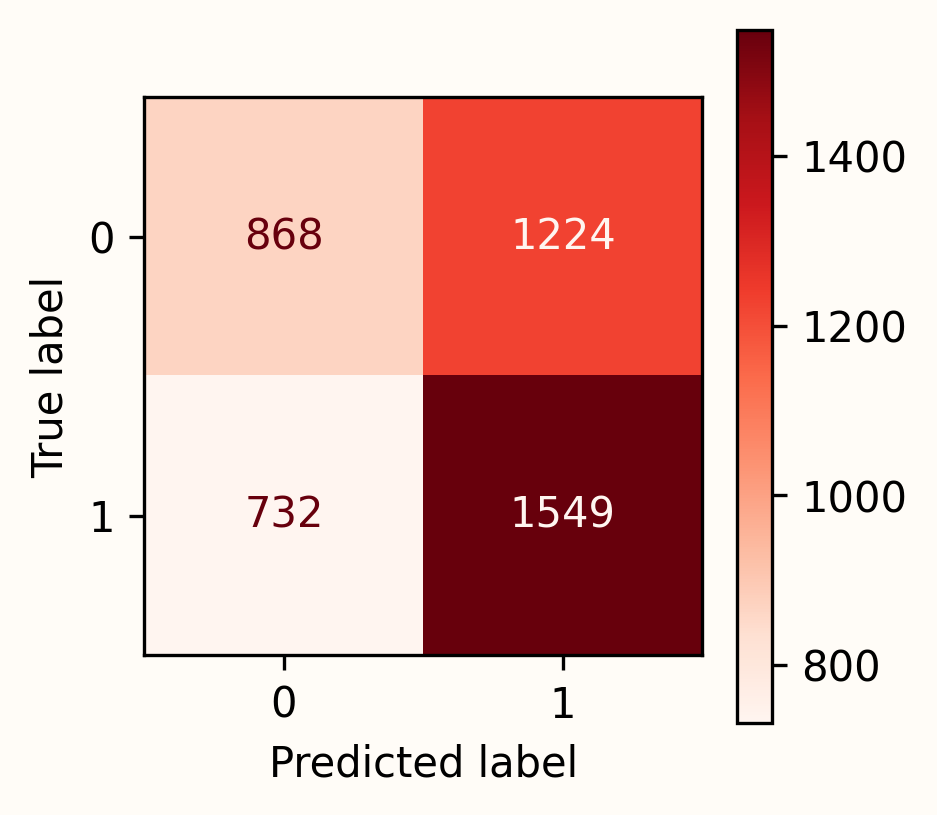

In [168]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train, display_labels=['0','1'])
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
plt.savefig("../plots/ConfusionMatrixTrain_lr.png")

## Confusion Matrix Test Set

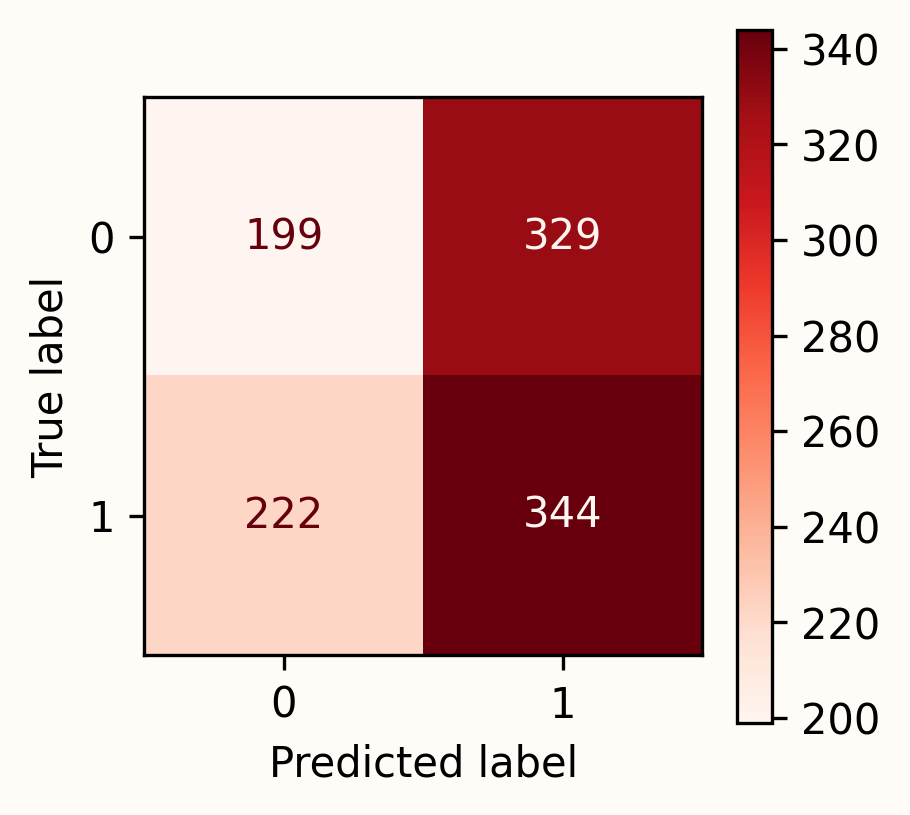

In [169]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=['0','1'])
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
plt.savefig("../plots/ConfusionMatrixTest_lr.png")

## Confusion Matrix Validation Set

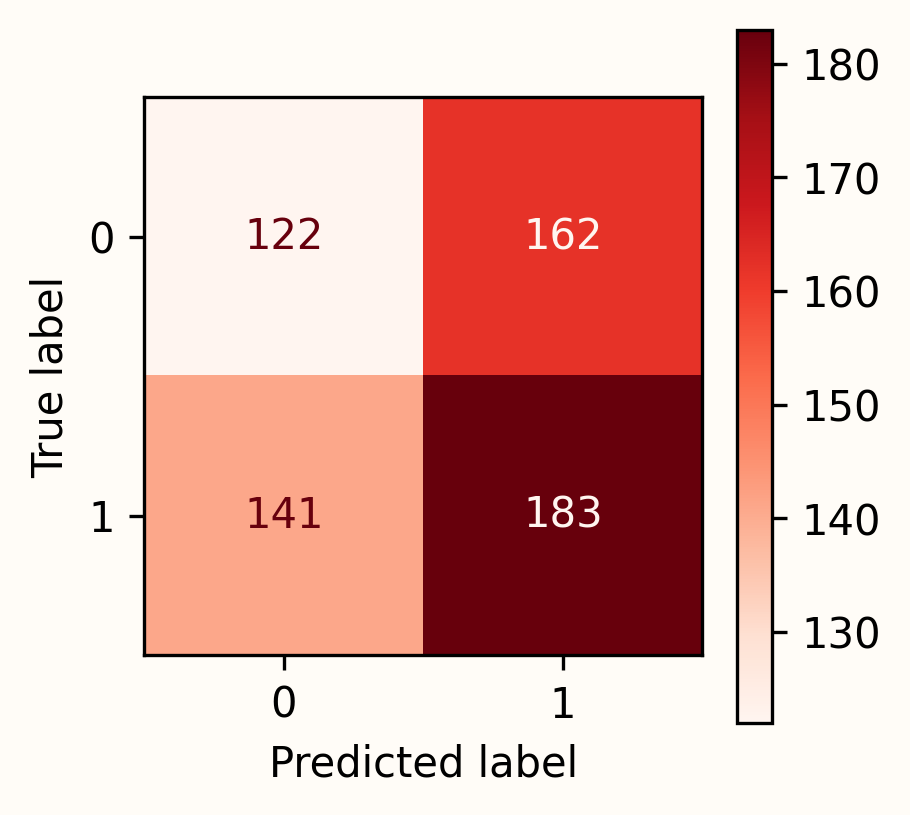

In [170]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_val = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(cm_val, display_labels=['0','1'])
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
plt.savefig("../plots/ConfusionMatrixValidation_lr.png")

## Error Matrix

In [171]:
error_metric = pd.DataFrame({"Train":[accuracy_score(y_train, y_train_pred),f1_score(y_train,y_train_pred),
                                recall_score(y_train,y_train_pred),precision_score(y_train, y_train_pred),
                                cohen_kappa_score(y_train, y_train_pred)],
                                "Test":[accuracy_score(y_test, y_test_pred),f1_score(y_test,y_test_pred),
                                recall_score(y_test,  y_test_pred),precision_score(y_test, y_test_pred),
                                cohen_kappa_score(y_test, y_test_pred)],
                                "Val":[accuracy_score(y_val, y_val_pred),f1_score(y_val,y_val_pred),
                                recall_score(y_val,  y_val_pred),precision_score(y_val, y_val_pred),
                                cohen_kappa_score(y_val, y_val_pred)]},
                                index=["accuracy","F1","recall","precission","kappa"])

In [172]:
error_metric

,Train,Test,Val
accuracy,0.552710,0.496344,0.501645
F1,0.612980,0.555287,0.547085
recall,0.679088,0.607774,0.564815
precission,0.558601,0.511144,0.530435
kappa,0.094927,-0.015437,-0.005633


In [173]:
name = classification.feature_names_in_.tolist()
#name

In [174]:
coef = classification.coef_.tolist()[0]
coef = np.abs(coef)

In [175]:
pd.DataFrame({'name':name,'abs_coef':coef}).sort_values('abs_coef', ascending=False).head(10)

,name,abs_coef
2,rsi_3,1.439368
12,STOCHd_14_3_3,0.706736
17,cmf_7,0.601576
18,cmf_14,0.444589
11,STOCHk_14_3_3,0.408047
7,BBB_7_2.0,0.404651
13,atr_3,0.329270
4,rsi_14,0.327092
42,pos_BBU_14_2.0,0.281183
31,pos_ema_3,0.280367


# Export

In [176]:
today = date.today()
model_name = 'logistic_regression'
description = 'with_feature_selection'

In [177]:
error_metric.to_csv('../data/results/error_metric_{}_{}_{}.csv'.format(model_name,description,today))